# OOP implementation of the blackjack game

In [ ]:
from cards.blackjack import Player, HumanPlayer, Dealer
from cards.deck import BlackJackDeck

In [ ]:
deck = BlackJackDeck()

In [ ]:
p1 = HumanPlayer(name='Sabrina', initial_capital=200)
p2 = HumanPlayer(name='Maddalena', initial_capital=200)

In [ ]:
dealer = Dealer(deck=deck, initial_capital=200)

In [ ]:
for p in [p1, p2]:
    dealer.add_player(p)
dealer.serve()
dealer.collect_bets()

In [ ]:
dealer.game()

In [ ]:
dealer.hand
dealer.value_hand()

In [ ]:
dealer.pay()

In [ ]:
dealer.capital

In [ ]:
for p in [p1, p2]:
    print(p.capital)

## Automatic play

In [1]:
from cards.blackjack import Player, HumanPlayer, Dealer, DummyPlayer
from cards.deck import BlackJackDeck

In [67]:
deck = BlackJackDeck()
dealer = Dealer(deck=deck, initial_capital=500)
p1 = DummyPlayer(name='Brave', initial_capital=500, fixed_bet=10, hit_parameter=.7)
p2 = DummyPlayer(name='Balanced', initial_capital=500, fixed_bet=10, hit_parameter=.5)
p3 = DummyPlayer(name='Stable', initial_capital=500, fixed_bet=10, hit_parameter=.3)
dealer.add_player(p1)
dealer.add_player(p2)
dealer.add_player(p3)

In [68]:
history = {'Dealer': [dealer.capital]}
for p in dealer.table:
    history[p.name] = [p.capital]

In [69]:
history

{'Dealer': [500], 'Brave': [500], 'Balanced': [500], 'Stable': [500]}

In [70]:
for game in range(20):
    dealer.serve()
    dealer.collect_bets()
    dealer.game()
    dealer.pay()
    history['Dealer'].append(dealer.capital)
    for p in dealer.table:
        history[p.name].append(p.capital)

## Visualize

In [71]:
import matplotlib.pyplot as plt

In [85]:
plt.style.use('ggplot')

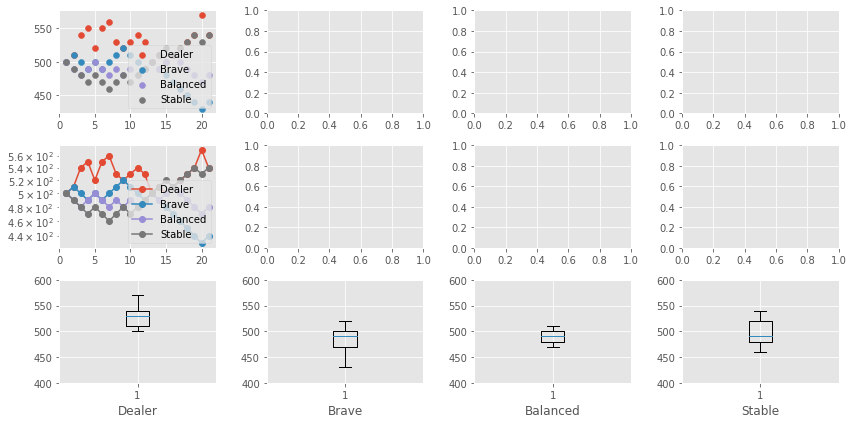

In [87]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=4, nrows=3)
for i, (player, values) in enumerate(history.items()):
    ax[1,0].plot(range(1, len(values)+1), values, marker='o', label=player)
    ax[0,0].scatter(range(1, len(values)+1), values, marker='o', label=player)
    ax[2,i].boxplot(values)
    ax[2,i].set_xlabel(player)
    ax[2,i].set_ylim((400, 600))
ax[1,0].set_yscale('log')
ax[1,0].legend()
ax[0,0].legend()
plt.tight_layout()
plt.show()

## Statistics